# [作業重點]
- 練習創立 DataFrame (In[2])
- 如何取出口數最多的國家 (In[3], Out[3])

## 練習時間
在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

#### Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家

### Hints: [隨機產生數值](https://blog.csdn.net/christianashannon/article/details/78867204)

In [45]:
import pandas as pd
import numpy as np

In [49]:
data = {'國家':["台灣", "United States","Thailand"] ,
        '人口':[np.random.randint(10000,100000), 
              np.random.randint(10000,1000000),
              np.random.randint(10000,100000000)] }
df = pd.DataFrame(data)
df

,國家,人口
0,台灣,29123
1,United States,304376
2,Thailand,83704828


In [50]:
df[df['人口'] == df['人口'].max()]["國家"].values[0]

'Thailand'

## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [4]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = "https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt"

In [5]:
# 讀取URL來源的方法
import requests
import pandas as pd
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

data = data.split('\n')

arrange_data = []
for line in data:
    arrange_data.append(line.split('\t'))

print(arrange_data[:5])

784594
[['n00015388_157', 'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg'], ['n00015388_238', 'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg'], ['n00015388_304', 'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg'], ['n00015388_327', 'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg'], ['n00015388_355', 'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg']]


In [70]:
# 讀取檔案的方法
with open("imagenet_urls_examples.txt", 'r', encoding="utf8") as f:
    data = f.readlines()

# 去除換行符號並切割欄位
arrange_data = [line.strip().split("\t") for line in data]
# 例如印出前 5 筆
for row in arrange_data[:5]:
    print(row)

['n00015388_157', 'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg']
['n00015388_238', 'http://farm2.static.flickr.com/1005/3352960681_37b9c1d27b.jpg']
['n00015388_304', 'http://farm1.static.flickr.com/27/51009336_a9663af3dd.jpg']
['n00015388_327', 'http://farm4.static.flickr.com/3025/2444687979_bf7bc8df21.jpg']
['n00015388_355', 'http://img100.imageshack.us/img100/3253/forrest004fs9.jpg']


## 將 txt 轉成 pandas dataframe

In [56]:
df = pd.DataFrame(arrange_data, columns=["name", "path"])
df.head()

,name,path
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

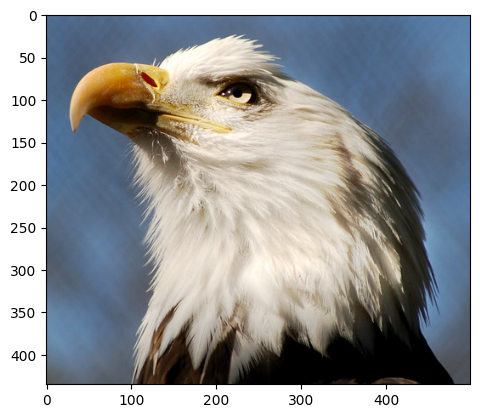

In [70]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0, "path"]

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array
img2 = np.array(img)

plt.imshow(img2)
plt.show()

In [93]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list = []
    for url in url_list:
        try:
            response = requests.get(url)
            print(response.status_code)
            img = Image.open(BytesIO(response.content))
            imgnp = np.array(img)
            img_list.append(imgnp)
        except Exception as ex:
            print(ex)
            continue
    return img_list

200
200
200
200
404
cannot identify image file <_io.BytesIO object at 0x0000020BB22FA840>
Some Image Available 4 PCS / 5 PCS
Total images that we got: 4


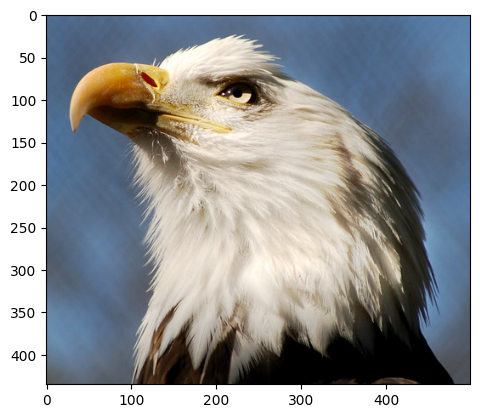

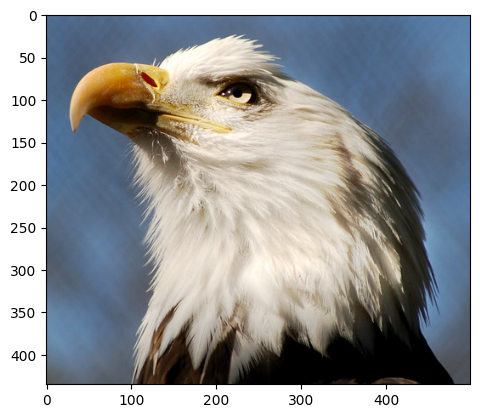

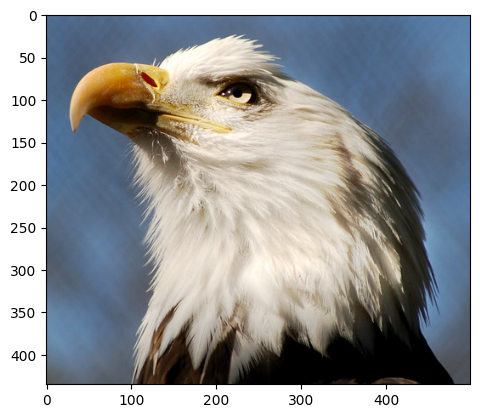

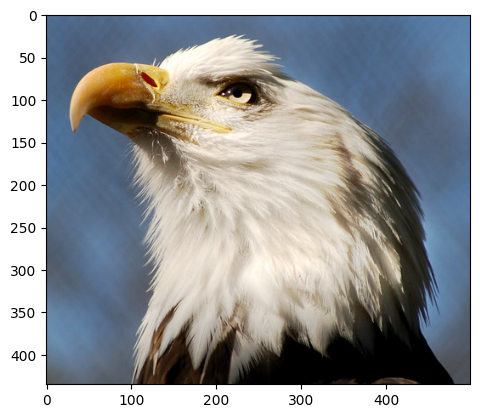

In [97]:
result = []
try:
    source = df.loc[[0,0,0,0,1], "path"].to_list()
   
    # 因為原本圖片資料第二張就壞掉了 改用00,0,0模擬第五筆故障
    result = img2arr_fromURLs(source)
except Exception as e:
    print("Image unvailable")
else:
    if len(source) == len(result):
        print("All Image Available")
    else:
        print("Some Image Available %i PCS / %i PCS" % (len(result), len(source) ) )
    
print("Total images that we got: %i" % len(result))
for im_get in result:
    plt.imshow(im_get)
    plt.show()